# DEMO: MEASURING THE STABILITY OF FEATURE SELECTION IN PYTHON

This is a demo in Python having the following objectives: <br /> 
<ol>
<li> - We illustrate the use of the <b>Python package</b> called "stability". You can download this package using the link available
        at: www.url.com .The package provides an implementation of the stability estimate, its variance, the confidence
        intervals, and the two hypothesis tests presented in the <b> JMLR (2017) paper "On the Stability of Feature Selection" [1] </b> <br />
<li> - Illustrating how this can be used in practice to quantify stability in 3 case scenarios: 
        - when applying feature selection using a logistic L1-regularized regression on an artificial dataset
        - when applying feature selection using the elastic net
        - when applying feature selection using mutual information of the features with the target variable
</ol>      
We point out that the stability measure implemented here (Fleiss' Kappa) reduces to Kuncheva's stability measure [5] when the number of features selected is constant equal to k. Therefore the confidence intervals, variance estimates and hypothesis tests are also valid for Kuncheva's stability measure in that case.

# Importing and using the Stability package

In [4]:
## before importing the package, make sure you have placd the stability folder (contining the __init__.py file) in the right directory
import stability as st

## Let us first observe the description and contents of the package
help(st)

Help on package stability:

NAME
    stability

DESCRIPTION
    This package implements the statistical tools for quantifying the stability of feature selection as given in [1].
    It includes 5 functions that provide:
        - the stability estimate of a feature selection procedure given its outputs;
        - the variance of the stability estimate;
        - a (1-alpha)- approximate confidence intervals for the population stability;
        - a null hypothesis test allowing to compare the population stability of a feature selection procedure to 
          a given value.
        - a null hypothesis test allowing to compare the population stabilities of two feature selection procedures.
    
    [1] On the Stability of Feature Selection. Sarah Nogueira, Konstantinos Sechidis, Gavin Brown. 
        Journal of Machine Learning Reasearch (JMLR). 2017.
    
    You can find a full demo using this package at:
    http://htmlpreview.github.io/?https://github.com/nogueirs/JMLR2017/blob/mast

<b>Once the package imported (import stability as st), you can call any of the functions decribed in the help using:<br>
st.function </b>

Let us give a few examples with 2 simple toy cases. <br>
Let us assume we have two feature selection procedures selecting k=2 features out of d=3 features in total. <br>
We apply each feature selection procedure to M=3 bootstrap samples of the same data set and store the feature selection output in two matrices Z<sub>1</sub> and Z<sub>2</sub> of size M*d as follows:
<img src="example1.png" width="400"> <br>
Each row represent a feature set, where a 1 at the f<sup>th</sup> means the f<sup>th</sup> feature has been selected and a 0 means it has not been selected. <br>
For the first feature selection procedure (with output Z<sub>1</sub>), the first 2 feature have been selected on each one of the M=3 repeats, while for the second feature selection procedure (with output Z<sub>2</sub>), the features selected are different on every repeat. <br><br>
Let us compute the stabilities of each one of these procedures using the imported package:

In [2]:
## first we implement Z1 and Z2 as lists of size M*d
Z1=[[1,1,0],[1,1,0],[1,1,0]]
Z2=[[1,1,0],[0,1,1],[1,0,1]]
stab1=st.getStability(Z1)
stab2=st.getStability(Z2)
print('Stability of procedure 1 is :',stab1)
print('Stability of procedure 2 is :',stab2)

Stability of procedure 1 is : 1.0
Stability of procedure 2 is : -0.5


As we can see, since all feature sets in Z<sub>1</sub> are identical, the stability of the first procedure is maximal and equal to 1. We note that even all pairs of feature sets in Z<sub>2</sub> have a feature in common, the stability of Z<sub>2</sub> is negative: this is a consequence of the correction for chance. Indeed, when choosing 2 features out of 3, the feature sets generated will always share at least one feature. The stability measure proposed corrects for this. Asymptotically (as M approaches infinity), the stability of a random procedure is 0 (and the stability values are asymptotically in the interval [0,1]). Let us illustrate this with the following example:

In [9]:
## Let us generate a matrix of M=10 feature sets each RANDOMLY selecting k=4 features out of d=10 features.
import numpy as np
d=10
k=4
M=10
Z3=np.zeros((M,d)) ## we initialize Z3 as a matrix of size M*d with zeros
arr=np.array([1,1,1,1,0,0,0,0,0,0])
for i in range(M): # for each row in Z3
    Z3[i,:]=arr
    arr=np.random.permutation(arr)
stab3=st.getStability(Z3)
print('Z3=',Z3)
print('\n Stability of Z3 is',stab3)

Z3= [[1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]]

 Stability of Z3 is -0.018518518518518823


As we can see, the stability of that matrix is close to 0, which we expected since the features are randomly selected. <br>
Let us now repeat the same operation, but with M=100 feature sets.

In [11]:
M=100
Z4=np.zeros((M,d)) ## we initialize Z4 as a matrix of size M*d with zeros
# print(Z4)
for i in range(M): # for each row in Z4
    Z4[i,:]=arr
    arr=np.random.permutation(arr)
stab4=st.getStability(Z4)
print(Z4)
print('Stability of Z4 is',stab4)

[[0. 0. 0. 1. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 1. 0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0.

As we can see, the stability estimate gets closer to 0 as we increase the number of feature sets.
Let us now compare the variance of these two stability estimates using the function of the stability package.

In [12]:
res3=st.getVarianceofStability(Z3)
res4=st.getVarianceofStability(Z4)
print(res3)
print(res4)
print('Variance of the random procedure with M=10 is:',res3['variance'])
print('Variance of the random procedure with M=100 is:',res4['variance'])

{'stability': -0.018518518518518823, 'variance': 0.005277777777777779}
{'stability': 0.005723905723905798, 'variance': 6.55711111111111e-05}
Variance of the random procedure with M=10 is: 0.005277777777777779
Variance of the random procedure with M=100 is: 6.55711111111111e-05


As we expected, the variance of the random feature selection procedure decreased as we increased M.<br>

# Some Useful Functions

In [13]:
import sklearn
from sklearn import metrics
import scipy.io as sio
import math

def getMutualInfos(data,labels):
    '''
    This function takes as input the data and labels and returns the mutual information of each feature 
    with the labels in a np.dnarray of length d
    
    INPUTS:
    - data is a 2-dimensional numpy.ndarray where rows are examples and columns are features
    - labels is a 1-dimansional numpy.ndarray giving the label of each example in data
    
    OUPUT:
    - a 1-dimensional numpy.ndarray of length d (where d is the number of features) 
      with the mutual information of each feature with the label
    '''
    M,d=data.shape
    mutualInfos=np.zeros(d)
    # for each feature
    for f in range(d):
        # we calculate the mutual information of the feature with the labels
        mutualInfos[f]=metrics.mutual_info_score(data[:,f],labels)
        print(mutualInfos[f])
    return mutualInfos


def getBootstrapSample(data,labels):
    '''
    This function takes as input the data and labels and returns 
    a bootstrap sample of the data, as well as its out-of-bag (OOB) data
    
    INPUTS:
    - data is a 2-dimensional numpy.ndarray where rows are examples and columns are features
    - labels is a 1-dimansional numpy.ndarray giving the label of each example in data
    
    OUPUT:
    - a dictionnary where:
          - key 'bootData' gives a 2-dimensional numpy.ndarray which is a bootstrap sample of data
          - key 'bootLabels' is a 1-dimansional numpy.ndarray giving the label of each example in bootData
          - key 'OOBData' gives a 2-dimensional numpy.ndarray the OOB examples
          - key 'OOBLabels' is a 1-dimansional numpy.ndarray giving the label of each example in OOBData
    '''
    m,d=data.shape
    if m!= len(labels):
        raise ValueError('The data and labels should have a same number of rows.')
    ind=np.random.choice(range(m), size=m, replace=True)
    OOBind=np.setdiff1d(range(m),ind, assume_unique=True)
    bootData=data[ind,]
    bootLabels=labels[ind]
    OOBData=data[OOBind,]
    OOBLabels=labels[OOBind]
    return {'bootData':bootData,'bootLabels':bootLabels,'OOBData':OOBData,'OOBLabels':OOBLabels}

def generateAtificialDataset(m,d,d_rel,rho):
    ''' This function enerates the artificial dataset used in the experiments (Section 7.1) of [1].
        The data set is made of continuous data where the first
        d_rel featues are relevant and where the d-d_rel remaining features are irrelevant to the target class
        this is a balanced data set where m/2 examples belong to class -1 and m/2 to class 1
        
        INPUTS:
        m is the number of samples
        d is the number of features/variables
        d_rel is the number of relevant features
        rho is the degree of redundancy (should be between 0 and 1)
        
        OUPUTS:
        A dictionnary with the data and the labels
    '''
    if d_rel>=d:
        raise ValueError('The input number of relevant features d_rel must be strictly less than the total number of features d')
    if rho<0 or rho >1:
        raise ValueError('The input argument rho controlling the degree of redundancy between the relevant features must be a value between 0 and 1.');
    num_positives=int(m/2) ## Take half instances as positive examples
    num_negatives=m-num_positives
    labels=np.concatenate((np.ones((num_positives),dtype=np.int8),-np.ones((num_negatives),dtype=np.int8)))
    mu_plus=np.concatenate((np.ones((d_rel),dtype=np.int8),np.zeros((d-d_rel)))) ## mean of the positive examples
    mu_minus=np.concatenate((-np.ones((d_rel),dtype=np.int8),np.zeros(d-d_rel)))  ## mean of the negative examples
    Sigma_star=rho*np.ones((d_rel,d_rel),dtype=np.int8)+(1-rho)*np.eye(d_rel)
    sub1=np.concatenate((Sigma_star,np.zeros((d_rel,d-d_rel))))
    sub2=np.concatenate((np.zeros((d-d_rel,d_rel)),np.eye(d-d_rel)))
    Sigma=np.concatenate((sub1,sub2),axis=1) ## the covariance matrix
    positive_ex=np.random.multivariate_normal(mu_plus, Sigma,num_positives)
    negative_ex=np.random.multivariate_normal(mu_minus, Sigma,num_negatives)
    data=np.concatenate((positive_ex,negative_ex),axis=0)
    ## we randomly permute the examples...
    order=ind=np.random.choice(range(m), size=m, replace=False)
    data=data[order,]
    labels=labels[order]
    trueRelevantSet=np.zeros(d)
    trueRelevantSet[range(d_rel)]=1
    return {'data':data,'labels':labels,'trueRelevantSet':trueRelevantSet}


# Optimizing Stability and Accuracy of Regularized Methods

We pick the hyper-parameters used to generate the artifical dataset as in [1]. <br>
We generate a data set with d=100 features where only the first d<sub>rel</sub> features a relevant to the target class.<br>
We chose a medium degree of redundancy rho=0.5.
The number of bootstrap samples chosen to quantify stability is M=100.

In [14]:
## we pick the hyper-parameters to generate the aritifical dataset
m=1000 # number of samples
d=100 # number of features 
d_rel=50 # the first d_rel features are relevant
rho=0.5 # the degree of redundancy between the relevant features
M=100 # number of bootstrap samples
res=generateAtificialDataset(m,d,d_rel,rho)
data=res['data']
labels=res['labels']

We apply L1-logistic regression with different regularizing parameters lambda on M bootstrap samples of the data using the scikit-learn package. We report the stability as given in [1] and the average out-of-bag (OOB) error over the M repeats.

In [15]:
from sklearn import linear_model
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.stats import norm

## First, we pick the hyper-parameters 
alpha=0.05 # the level of significance for confidence intervals and hypothesis tests
num_lambdas=10
lambdas=np.linspace(-2,-1,num_lambdas)
lambdas=np.power(10,lambdas) ## this gives us lambda values between 10e-2 and 10e-1 (lambda is the regularising parameter)
Z=np.zeros((num_lambdas,M,d),dtype=np.int8)
errors=np.zeros((M,num_lambdas))
stabilities=np.zeros(num_lambdas)
errStab=np.zeros(num_lambdas)
numFeatSelected=np.zeros((M,num_lambdas),dtype=np.int32)
## for each repeat
for i in range(M):
    newData=getBootstrapSample(data,labels) ## we get a bootstrap sample
    for k in range(num_lambdas):
        logistic = LogisticRegression(penalty='l1',solver='liblinear',C=lambdas[k],max_iter=100) ## We use logostic LASSO
        logistic.fit(newData['bootData'],newData['bootLabels'])  ## we fit the coefficients 
        Z[k,i,:]=sum(logistic.coef_!=0)
        numFeatSelected[i,k]=sum(sum(logistic.coef_!=0))
        predLabels=logistic.predict(newData['OOBData'])
        errors[i,k]=1-metrics.accuracy_score(newData['OOBLabels'], predLabels)
meanError=np.mean(errors,0)
errCI=norm.ppf(1-alpha/2)*(np.std(errors,0))/math.sqrt(M)

for k in range(num_lambdas):
    res=st.confidenceIntervals(Z[k,:,:],alpha=alpha) ## we get the confidence intervals using the stability package
    stabilities[k]=res['stability']
    errStab[k]=stabilities[k]-res['lower']
    

Let us first plot the number of features selected as we increase the regularizing parameter lambda.

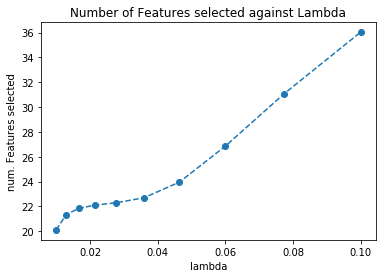

In [16]:
plt.close()
plt.figure()
plt.plot(lambdas,np.mean(numFeatSelected,0),marker='o', linestyle='--')
plt.xlabel('lambda')
plt.ylabel('num. Features selected')
plt.title('Number of Features selected against Lambda')
plt.show()

As we expect, the number of features selected decreases as we increase the regularization. <br>
Let us now plot the average OOB error against lambda.

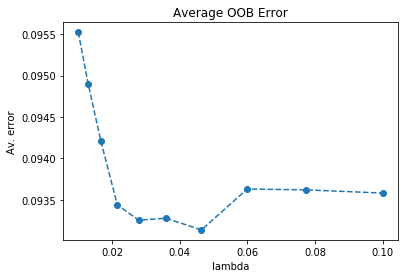

In [17]:
plt.close()
plt.figure()
plt.plot(lambdas,np.mean(errors,0),marker='o', linestyle='--')
plt.xlabel('lambda')
plt.ylabel('Av. error')
plt.title('Average OOB Error')
plt.show()

Let us plot the stability against lambda using the 95% confidence intervals (using the stability package).

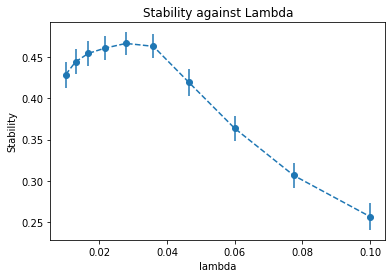

In [24]:
plt.close()
plt.figure()
plt.errorbar(lambdas,stabilities,yerr=errStab,marker='o', linestyle='--')
plt.xlabel('lambda')
plt.ylabel('Stability')
plt.title('Stability against Lambda')
plt.show()

We can plot the stability against the OOB error. 

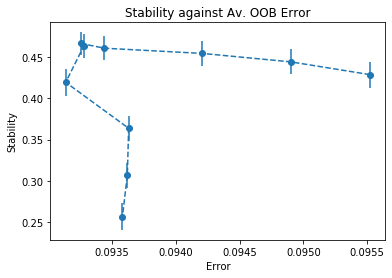

In [19]:
plt.close()
plt.figure()
plt.errorbar(meanError,stabilities,yerr=errStab,marker='o', linestyle='--')
plt.xlabel('Error')
plt.ylabel('Stability')
plt.title('Stability against Av. OOB Error')
plt.show()

<b>CONCLUSION:</b><br>
As we can see from these figures, the value of the regularizing parameter that yields the maximal stability (out of the 10 regularizing parameters chosen) is not the one yielding the minimum error. Here, a trade-off between error and stability needs to chosen.<br> Nevertheless, we can see that making a small sacrife in terms of accuracy can largely improve stability. 

<b> USING THE ELASTIC NET </b> <br>
In this section, we reproduce the experiments on the same data set using the elastic net. 

In [13]:
## we use the ElasticNet package from scikit-learn
from sklearn.linear_model import ElasticNet

M=30 ## for computational reasons, we reduce M to 30 here. 
## This will give us larger confidence intervals and more variance in the stability estimates
## Nevertheless, we have shown in the paper [1] that M=30 suffices in most scenarios
num_ratios=10
num_alphas=10
alphas=np.linspace(0.05,0.95,num_alphas) ## the first hyper-parameter of the elastic net
ratios=np.linspace(0.01,0.8,num_ratios)  ## the second hyper-parameter of the elastic net
Z_net=np.zeros((num_ratios,num_alphas,M,d),dtype=np.int8)
errors_net=np.zeros((M,num_ratios,num_alphas))
stabilities_net=np.zeros((num_ratios,num_alphas))
errStab_net=np.zeros((num_ratios,num_alphas))
numFeatSelected_net=np.zeros((M,num_ratios,num_alphas),dtype=np.int32)
for i in range(M):
    newData=getBootstrapSample(data,labels) ## we get bootstrap samples
    for k in range(num_ratios):
        for l in range(num_alphas):
            net=ElasticNet(alpha=alphas[l],l1_ratio=ratios[k],max_iter=500) ## we use elastic net
            net.fit(newData['bootData'],newData['bootLabels'])
            Z_net[k,l,i,net.coef_!=0]=1
            numFeatSelected_net[i,k,l]=np.sum(Z_net[k,l,i,],axis=0)
            predLabels_net=np.zeros(len(newData['OOBData']))
            temp=net.predict(newData['OOBData'])
            for j in range(len(newData['OOBData'])):
                if temp[j]>=0: predLabels_net[j]=1
                else:  predLabels_net[j]=-1
            errors_net[i,k,l]=1-metrics.accuracy_score(newData['OOBLabels'], predLabels_net)
meanError_net=np.mean(errors_net,0)

for k in range(num_ratios):
    for l in range(num_alphas):
        ## we use the stability package to get the stability estimate and its confidence intervals
        res=st.confidenceIntervals(Z_net[k,l,],alpha=alpha)    
        stabilities_net[k,l]=res['stability']
        errStab_net[k,l]=stabilities_net[k,l]-res['lower']
    

/Users/liuyue/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.45985487435631, tolerance: 0.09998999999999982
  model = cd_fast.enet_coordinate_descent(
/Users/liuyue/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.36129319730745, tolerance: 0.09998999999999982
  model = cd_fast.enet_coordinate_descent(
/Users/liuyue/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.8781471403436285, tolerance: 0.09998999999999982
  model = cd_fast.enet_coordinate_descent(
/Users/liuyue/opt/anaconda3/lib/python3.8/site-packages/sklearn

In the plot above, each line represent a different ratio parameter of the elastic net. <br>
Since these experiments only serve an illustrative purpose, we do not mind the non-convergence of the optimization algorithm of the elastic net and kept the maximal number of iterations equal to 500. <br><br>

In all the figures below, each line correspond to a specific of the ratio hyper-parameter, and each point of the line corresponds to a different alpha value (second hyper-parameter of the ealstic net). 

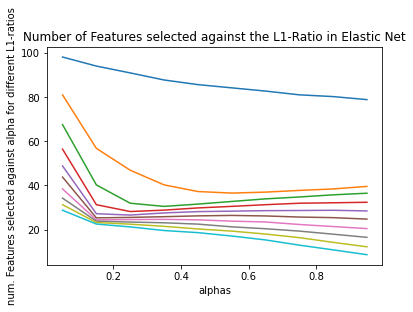

In [14]:
import matplotlib.pyplot as plt
plt.close()
plt.figure()
numFeatSelected_net[i,k,l]
for k in range(num_ratios):
    plt.plot(alphas,np.mean(numFeatSelected_net[:,k,:],axis=0))
plt.xlabel('alphas')
plt.ylabel('num. Features selected against alpha for different L1-ratios')
plt.title('Number of Features selected against the L1-Ratio in Elastic Net')
plt.show()

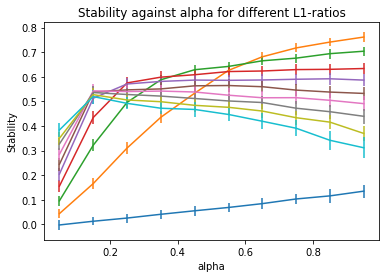

In [15]:
plt.close()
plt.figure()
for k in range(num_ratios):
    plt.errorbar(alphas,stabilities_net[k,:],yerr=errStab_net[k,:])
plt.xlabel('alpha')
plt.ylabel('Stability')
plt.title('Stability against alpha for different L1-ratios')
plt.show()

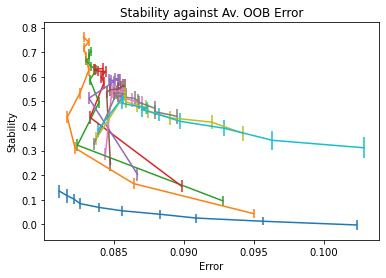

In [18]:
plt.close()
plt.figure()
for k in range(num_ratios):
    plt.errorbar(meanError_net[k,:],stabilities_net[k,:],yerr=errStab_net[k,:])
plt.xlabel('Error')
plt.ylabel('Stability')
plt.title('Stability against Av. OOB Error')
plt.show()

<b>CONCLUSIONS:</b><br>
As we can see, the hyper-parameters optimizing the error of our model are not the same as the ones optimizing the stability. <br>
Nevertheless, we can see that in this case, it is possible to choose a reasonable trade-off between the two, with a <i>high</i> stability and <i>low</i> error.  

# Information Theory Example

Let us assume we now select the top-k features that have the highest mutual information with the target class. <br>
We check the stability of this feature selection procedure against k in the example below. <br>
For this purpose, we use the heart dataset from the UCI repository, where we have discretized the features using 10 bins as done by [3] (the dataset is available at [4]). 

In [19]:
## We set the chosen hyper-parameters
M=100
dataName='heartEW.mat'
kValues=range(1,d-1) ## an array with the number of features we want to select
## We load the desired dataset
res=sio.loadmat(dataName)
data=res['data']
labels=res['labels']
m,d=data.shape
labels=labels.reshape(m)
Z=np.zeros((len(kValues),M,d),dtype=np.int8) # this will store the M feature sets
for i in range(M):
    newData=getBootstrapSample(data,labels) ## we get bootstrap samples
    mutualInfos=getMutualInfos(newData['bootData'],newData['bootLabels']) ## we get the mutual informaion on the bootstrap samples
    ind=np.argsort(mutualInfos) #sorts the mutual informations in increasing order
    for j in range(len(kValues)):
        ## we retrieve the indices of the top-k mutual informations
        #print(list(range(d-1,d-1-kValues[j],-1)))
        topK=ind[range(d-1,d-1-kValues[j],-1)] ## the indices of the features with the kValues[k] highest MIs 
        Z[j,i,topK]=1 
# now we get the stability with confidence intervals   
stabilities=np.zeros(len(kValues))
stabErr=np.zeros(len(kValues))
for j in range(len(kValues)):
    res=st.confidenceIntervals(Z[j,],alpha=0.05)
    stabilities[j]=res['stability']
    stabErr[j]=stabilities[j]-res['lower']

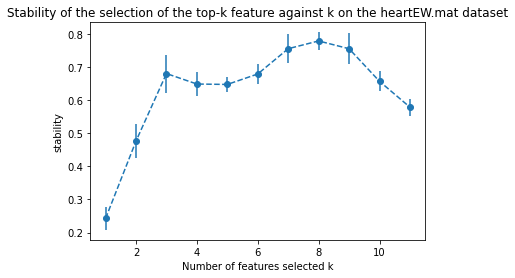

In [20]:
import matplotlib.pyplot as plt
stabilities=np.zeros(len(kValues))
stabErr=np.zeros(len(kValues))
for j in range(len(kValues)):
    res=st.confidenceIntervals(Z[j,],alpha=0.05)
    stabilities[j]=res['stability']
    stabErr[j]=stabilities[j]-res['lower']
plt.close()
plt.figure()
plt.errorbar(kValues,stabilities,yerr=stabErr,marker='o', linestyle='--')
plt.ylabel('stability')
plt.xlabel('Number of features selected k')
plt.title("Stability of the selection of the top-k feature against k on the "+dataName+" dataset")
plt.show()

<b>CONCLUSIONS:</b><br>
- On the figure above, we can observe how the stability varies with the number of features selected k on the heart dataset. We also provide 95% confidence intervals indicating that 95% of the time, the true population stability will belong to the interval. 
- In practice, this cannot be used alone to decide on a number of features to be selected. The hyperparameters of the algorithm (here, the number of features selected k) should be optimized against stability AND the generalization error, in a multi_objective way. Often, one needs to make a trade-off between stability and classification error.

# REFERENCES

[1] Nogueira, Sechidis and Brown (2017). On the Stability of Feature Selection. Journal of Machine Learning Research (JMLR). <br />
[2] Brown, Pocock, Zhao and Luján (2012). Conditional Likelihood Maximisation: A Unifying Framework for Information Theoretic Feature Selection. Journal of Machine Learning Reasearch (JMLR). <br />
[3] http://www.cs.man.ac.uk/~gbrown/fstoolbox/ <br />
[4] Kuncheva (2007). A Stability Index for Feature Selection. Proceedings of the 25th IASTED International Multi-Conference, Artificial Intelligence and Applications.  <br />
<!-->[2] Kamkar, Gupta, Phung and Venkatesh (2015). Stable Feature Selection With Support Vector Machines. In AI 2015: Advances in Artificial Intelligence. <br /> <--->